In [1]:
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [6]:
import pandas as pd

df = pd.read_csv('/content/cars.csv')

print(df)

        brand  km_driven    fuel                 owner  selling_price
0      Maruti     145500  Diesel           First Owner         450000
1       Skoda     120000  Diesel          Second Owner         370000
2       Honda     140000  Petrol           Third Owner         158000
3     Hyundai     127000  Diesel           First Owner         225000
4      Maruti     120000  Petrol           First Owner         130000
...       ...        ...     ...                   ...            ...
8123  Hyundai     110000  Petrol           First Owner         320000
8124  Hyundai     119000  Diesel  Fourth & Above Owner         135000
8125   Maruti     120000  Diesel           First Owner         382000
8126     Tata      25000  Diesel           First Owner         290000
8127     Tata      25000  Diesel           First Owner         290000

[8128 rows x 5 columns]


In [7]:
data = datasets.load_wine(as_frame = True)


X = data.data
y = data.target

In [8]:
df = pd.DataFrame(X)
features= df.columns
cn= pd.DataFrame([0,1,2])


scale = StandardScaler() #standardization
X = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

Train data accuracy: 1.0
Test data accuracy: 0.8444444444444444
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.78      0.82      0.80        17
           2       0.92      0.80      0.86        15

    accuracy                           0.84        45
   macro avg       0.85      0.85      0.85        45
weighted avg       0.85      0.84      0.84        45



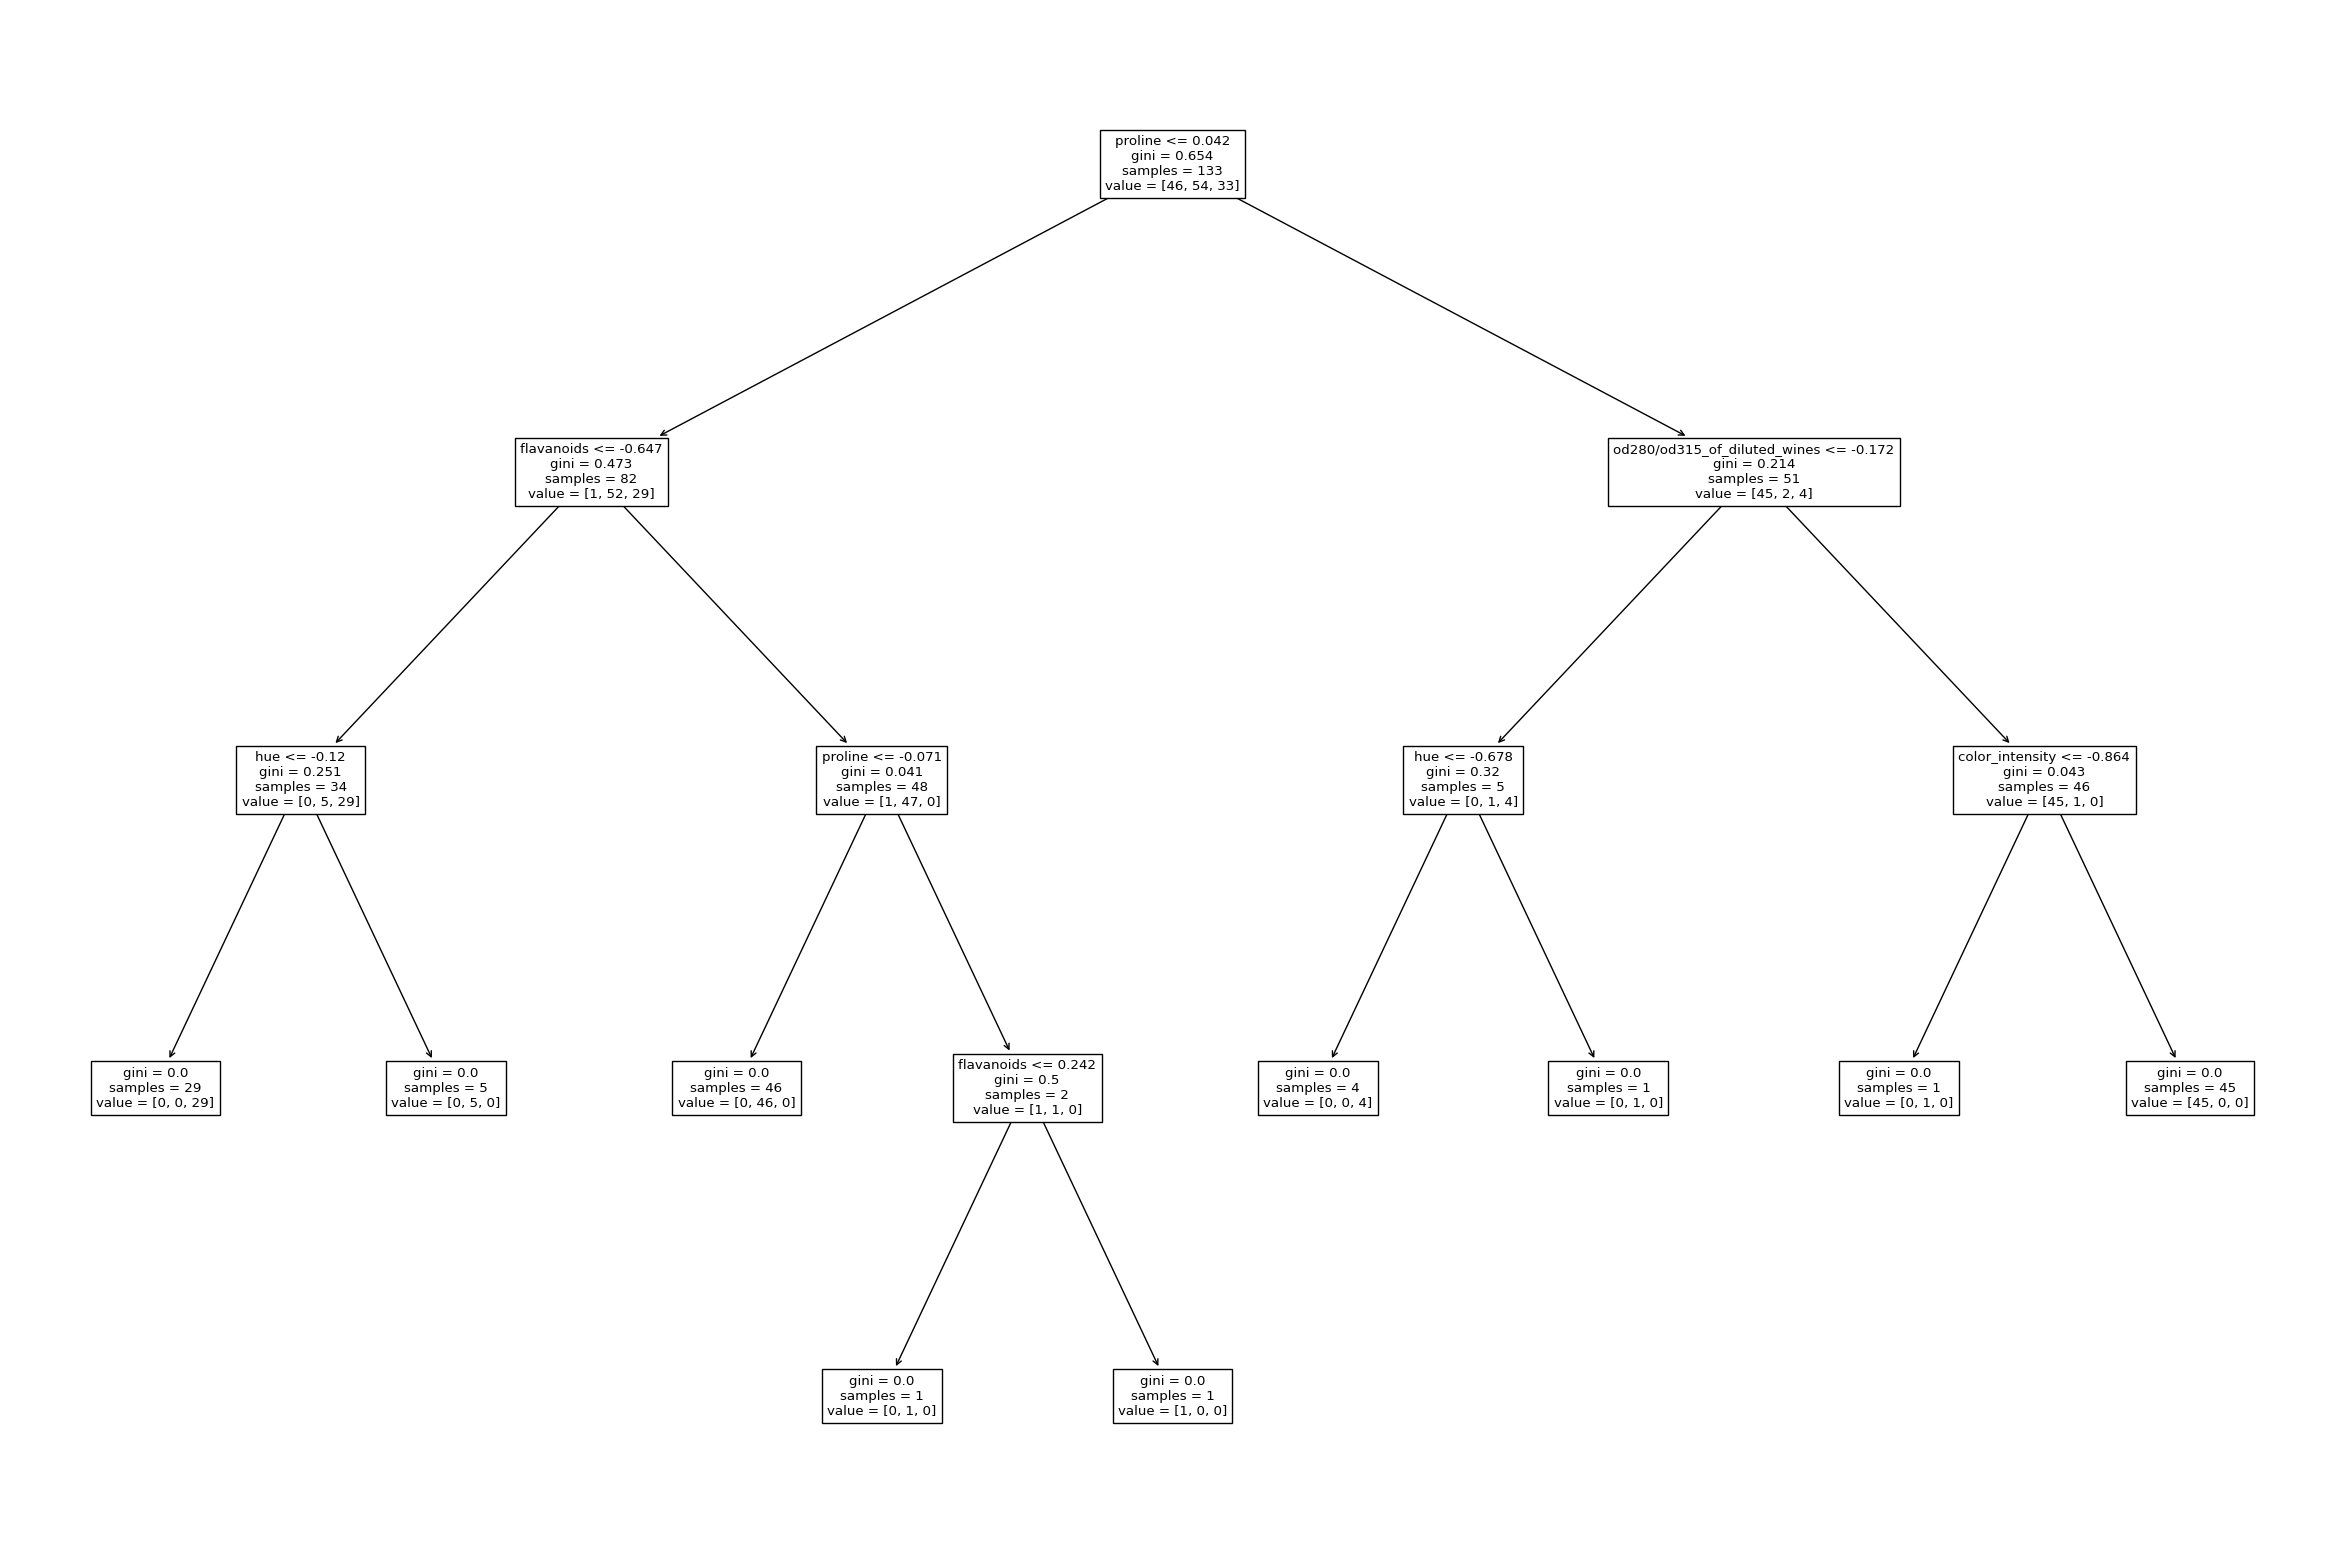

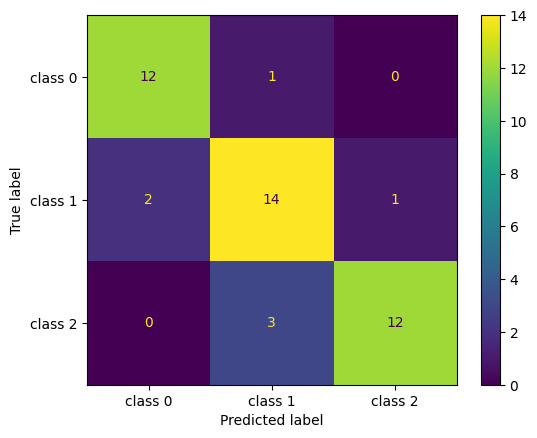

In [10]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier() #training
dtree.fit(X_train,y_train)


plt.figure(figsize=(30, 20))
tree.plot_tree(dtree, feature_names = features) #plotting the decision tree

y_pred = dtree.predict(X_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = dtree.predict(X_test)))


c1=classification_report(y_test, dtree.predict(X_test))
print(c1)
confusion_matrix = metrics.confusion_matrix(y_test, dtree.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1','class 2'])
cm_display.plot()
plt.show()

In [11]:
import warnings
warnings.filterwarnings("ignore")

Train data accuracy: 0.9849624060150376
Test data accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.82      0.90        17
           2       0.88      1.00      0.94        15

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



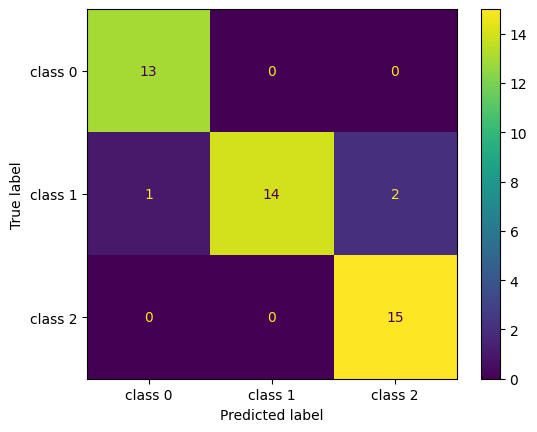

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = knn.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = knn.predict(X_test)))


c1=classification_report(y_test, knn.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, knn.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1','class 2'])
cm_display.plot()
plt.show()

Train data accuracy: 1.0
Test data accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



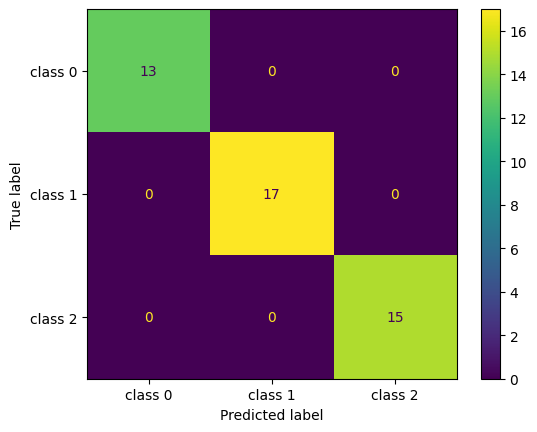

In [13]:
from sklearn import linear_model
logr = linear_model.LogisticRegression()
logr.fit(X_train,y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = logr.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = logr.predict(X_test)))


c1=classification_report(y_test, logr.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, logr.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1','class 2'])
cm_display.plot()
plt.show()

Train data accuracy: 1.0
Test data accuracy: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.88      0.82      0.85        17
           2       0.93      0.93      0.93        15

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45



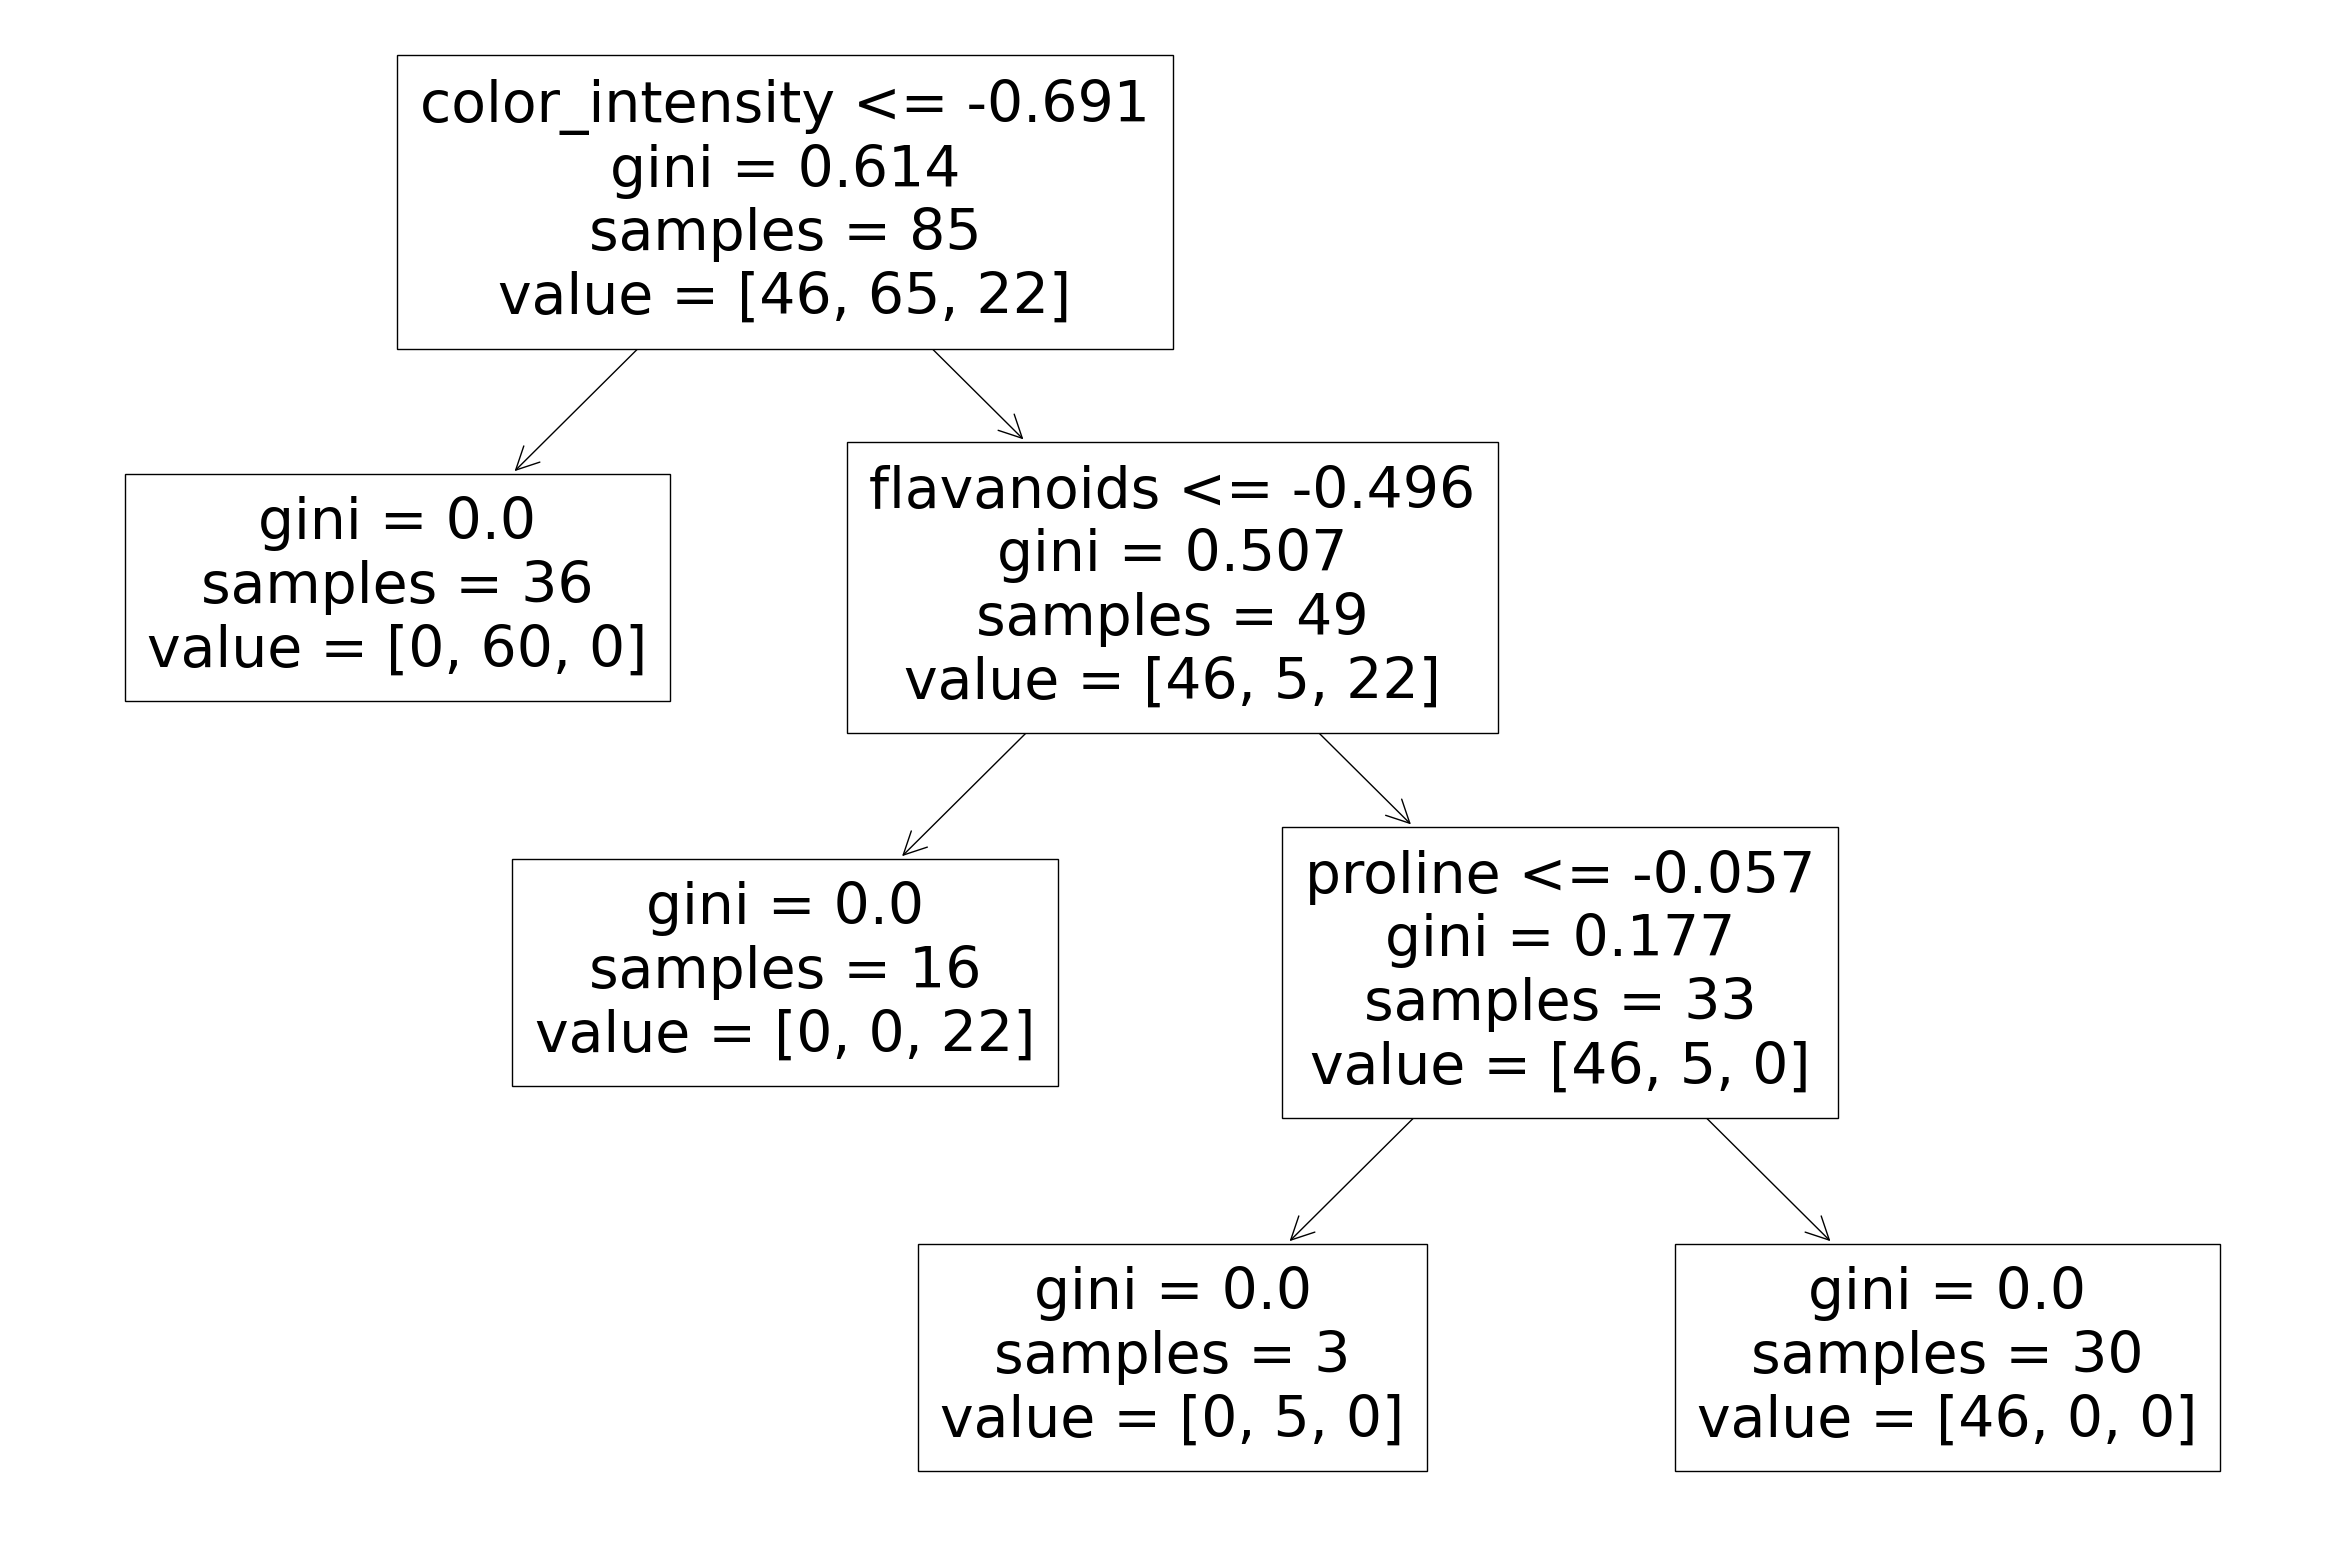

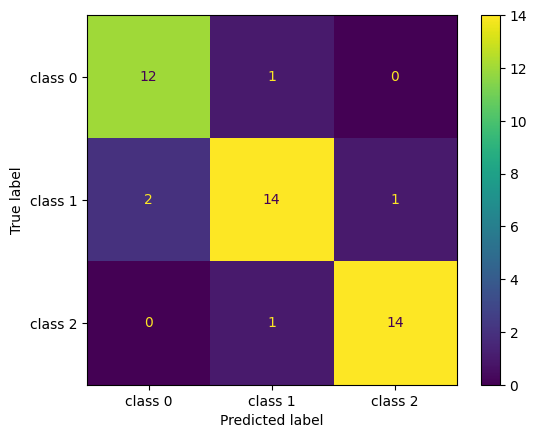

In [14]:

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree

bagg = BaggingClassifier(n_estimators = 12)
bagg.fit(X_train, y_train)


plt.figure(figsize=(30, 20))
plot_tree(bagg.estimators_[0],feature_names = features )

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = bagg.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = bagg.predict(X_test)))


c1=classification_report(y_test, bagg.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, bagg.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1','class 2'])
cm_display.plot()
plt.show()

Train data accuracy: 1.0
Test data accuracy: 0.9111111111111111
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.84      0.94      0.89        17
           2       0.93      0.87      0.90        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.92        45
weighted avg       0.92      0.91      0.91        45



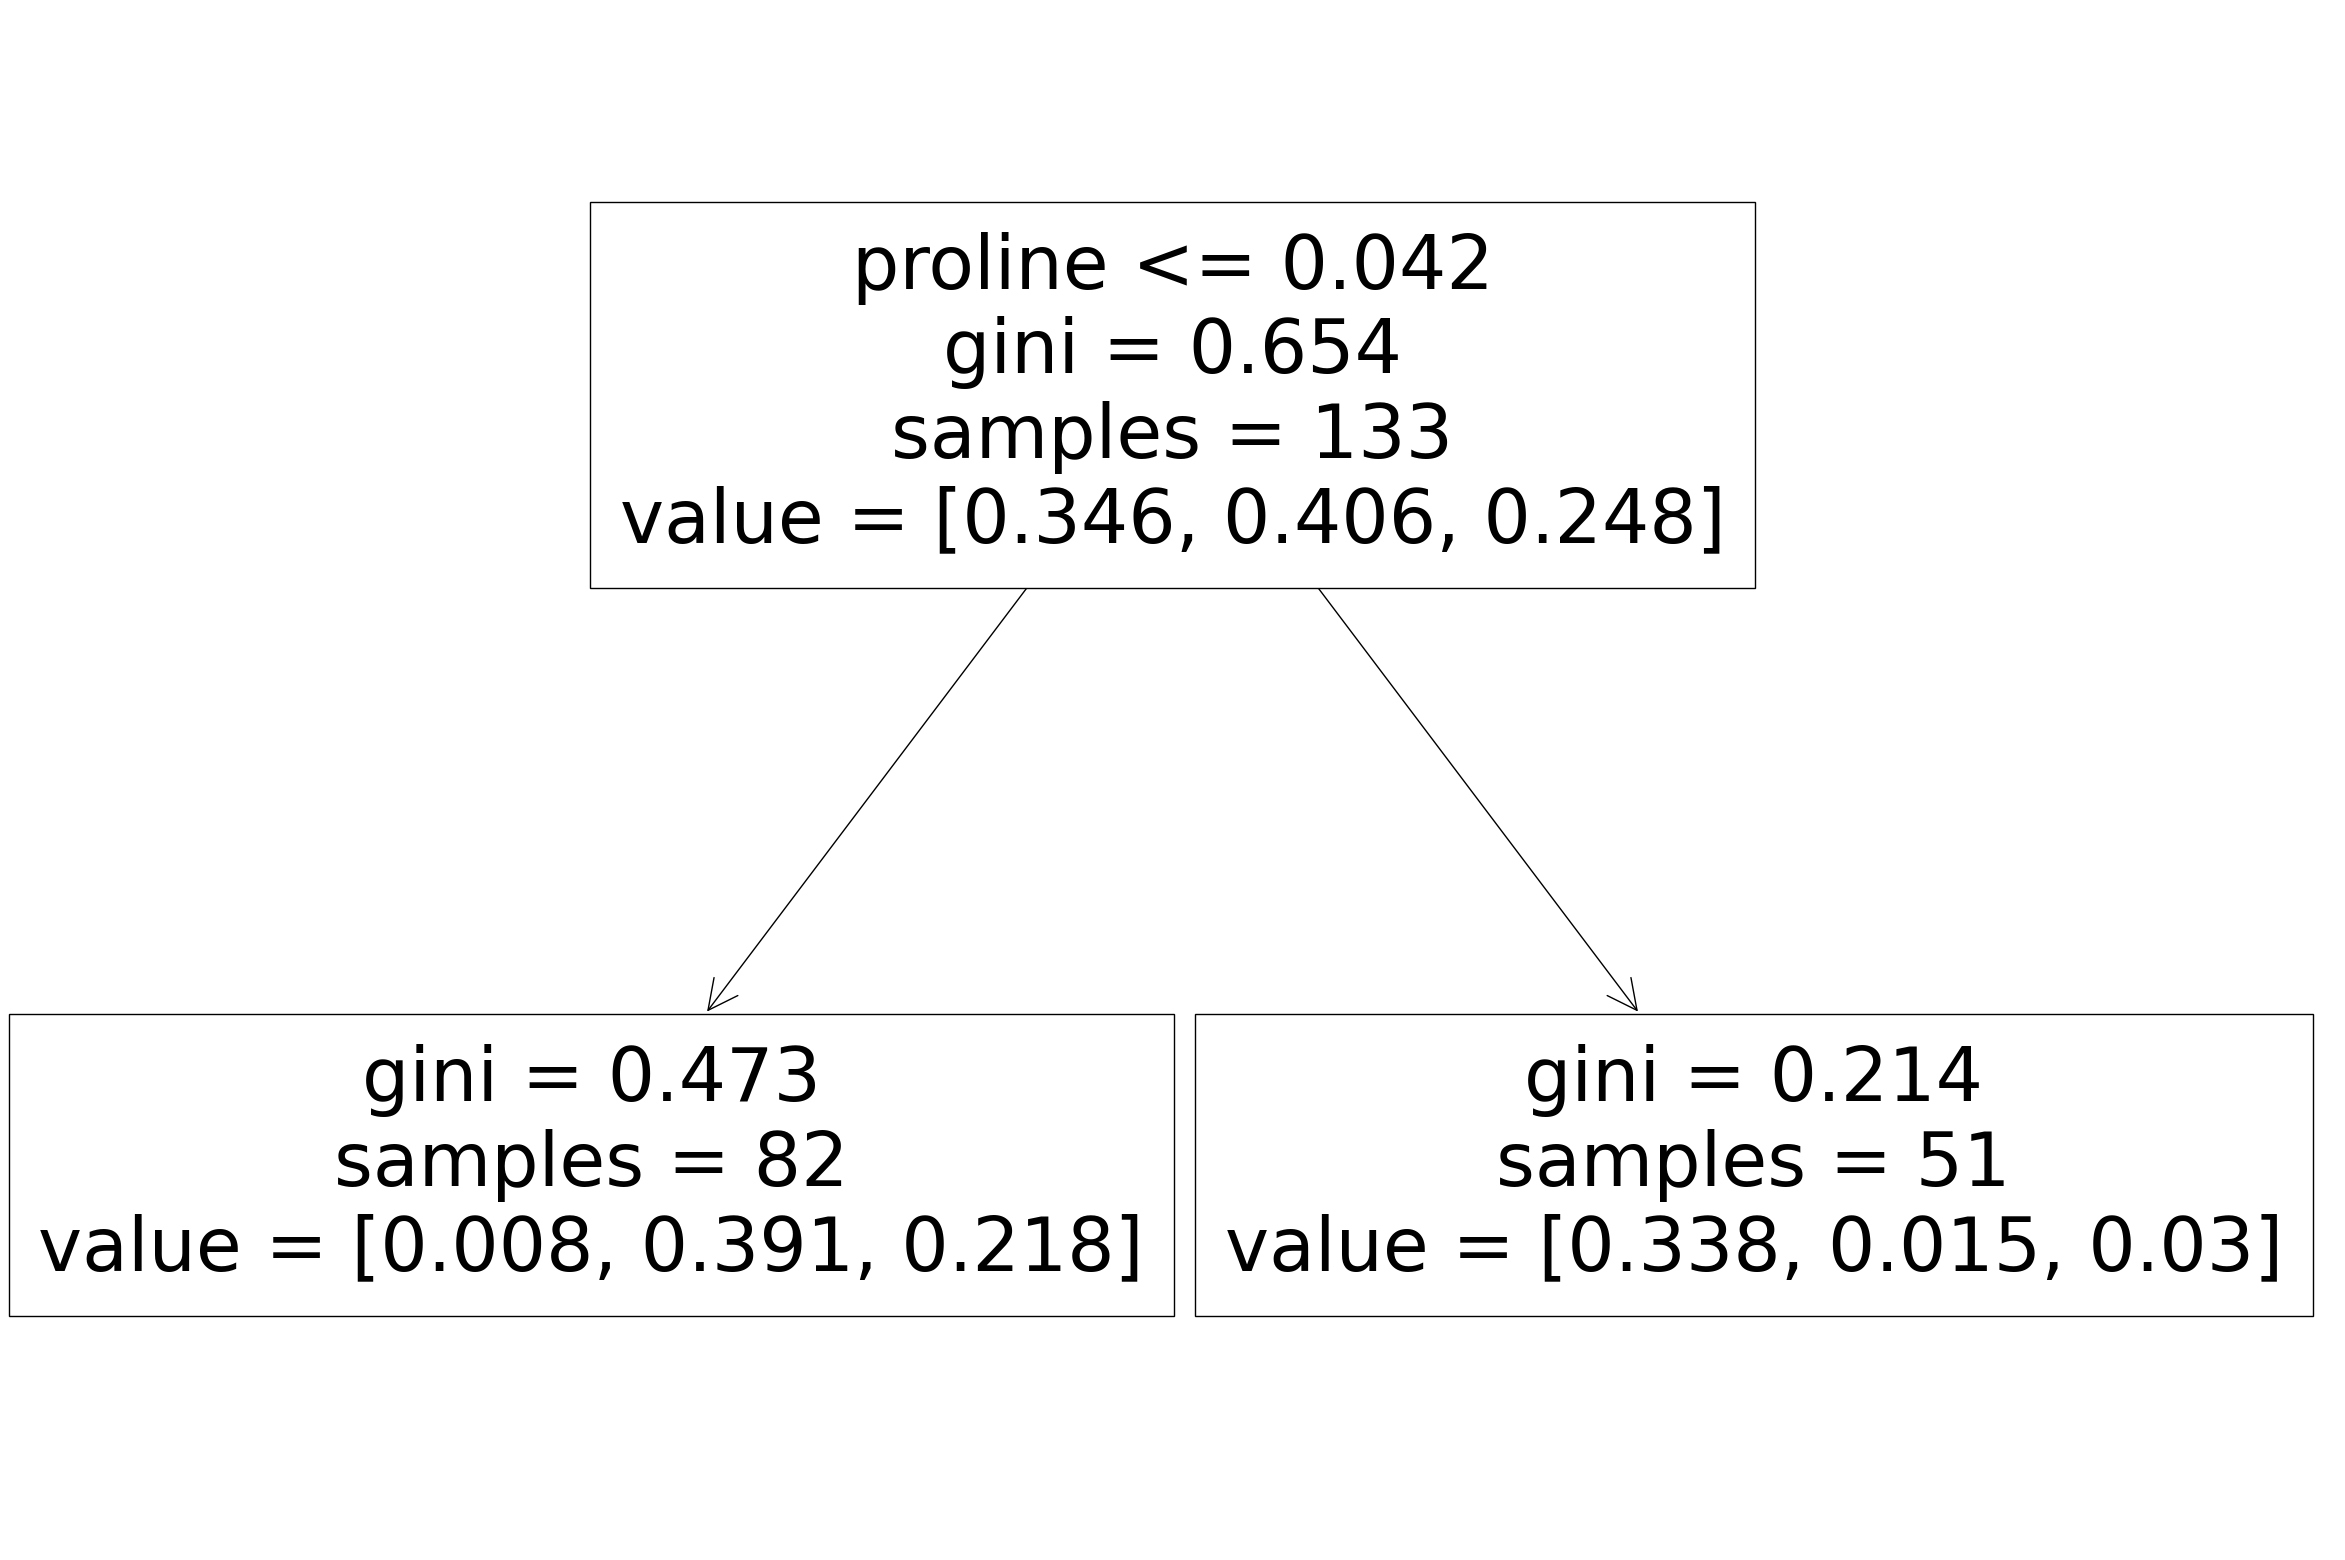

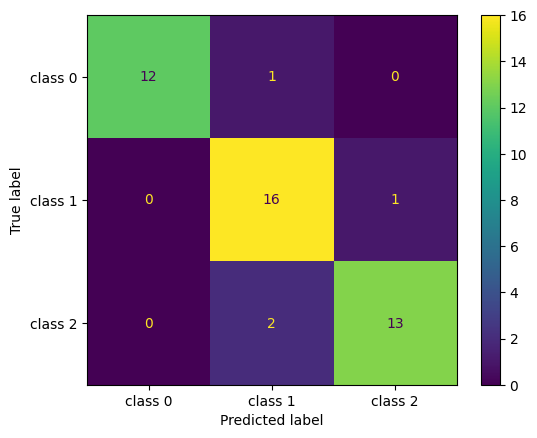

In [17]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50)
ada.fit(X_train, y_train)

plt.figure(figsize=(30, 20))
plot_tree(ada.estimators_[0],feature_names = features )

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = ada.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = ada.predict(X_test)))


c1=classification_report(y_test, ada.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, ada.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1','class 2'])
cm_display.plot()
plt.show()